In [6]:
from qick_data import *
from scipy.optimize import curve_fit
import numpy as np
import os
import sys

Reading from filepath c:\Users\Hannah\Desktop\SLAC\squat2\Data\T1
Creating dataset with series 20240511_224624


Text(0, 0.5, 'Amplitude')

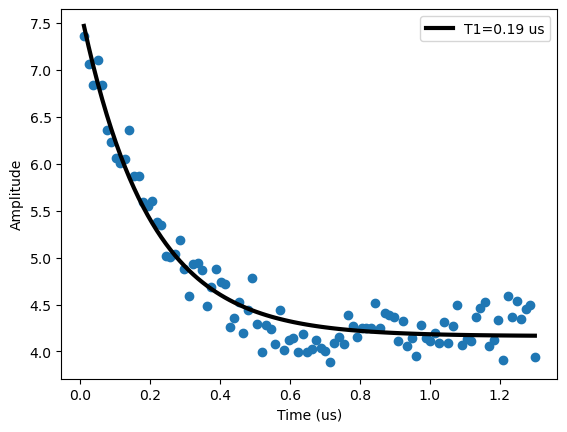

In [23]:
## Pull the data
datapath = 'c:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Data\\T1'
os.chdir(datapath)
flist = os.listdir()

## Read in and fit degenerate "parity data
fn = "20240511_224624_T1_pulsingCB_degenerate.h5"
f = read_H5(datapath=datapath, filename=fn, dataclass=QICKdata)

time = f.meas_data['delays_us']
amps = np.abs(f.meas_data['Ivals'] + 1j*f.meas_data['Qvals'])

## fit to exponential
def exp_decay(x, A, tau, offset):
    return A*np.exp(-x/tau) + offset

popt, pcov = curve_fit(exp_decay, time, amps, p0=[2, 0.1, 4])
plt.plot(time, amps, 'o')
plt.plot(time, exp_decay(time, *popt), color='black', linewidth=3, label=f"T1={popt[1]:.2f} us")
plt.legend()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude')
plt.title("T1 through charge line with parity states degenerate")